# Relevante Bibliotheken importieren

- transact_train   = Transaktionsdaten zum trainieren
- transact_class   = aktuelle Transaktionsdaten zum testen
- realclass_t1     = "Lösung" der transact_class ob Käufer oder nicht

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Methoden für den Import der vorbereiteten Daten

In [8]:
def get_test_data(train_df,test_df):
    X_train = train_df.iloc[:, :train_df.shape[1] - 1]
    X_test = test_df.iloc[:, :test_df.shape[1] - 1]
    y_train = train_df['order']
    y_test  = test_df['order']
    return X_train, X_test, y_train, y_test

In [9]:
def import_data_2(path):
    df = pd.read_csv(path)
    df.set_index('sessionNo', inplace=True)
    df.sort_index(inplace=True)
    return df
def get_all_data():
    columns_data = ['X_train_','X_test_','y_train_','y_test_']
    fill_modes = ['mean','mode','median']
    column_count = [5,10,15,20]
    new_dict = {}

    for fill_mode in fill_modes:
        for count in column_count:
            filename_base = '~/Google Drive/Studium/StrategischeSysteme/data/'
            filename_2 = filename_base + 'train' + '_' + fill_mode + '_' + str(count) + '.csv'
            train_file = import_data_2(filename_2)
            filename_2 = filename_base + 'class' + '_' + fill_mode + '_' + str(count) + '.csv'
            class_file = import_data_2(filename_2)
            X_train, X_test, y_train, y_test = get_test_data(train_file,class_file)
            new_dict[fill_mode + '_' + str(count)] = {
                'X_train':X_train,
                'X_test':X_test,
                'y_train':y_train,
                'y_test':y_test
            }
    return new_dict

# K nearest neighbor

In [10]:
data_knn = get_all_data()

## Spalten visualisieren

In [7]:
def down_size_data(factor, df):
    print('Shape of dataframe before down sizing with factor' + str(factor) +':' + str(df.shape))
    sampleSize = int(len(df.index) * factor)
    df = df.sample(sampleSize)
    print('Shape of dataframe after down sizing with factor' + str(factor) + ':' + str(df.shape))
    return df

In [10]:
data_median_5_plot_X = data_knn['median_5']['X_train']
data_median_5_plot_y = data_knn['median_5']['y_train']
data_median_5_plot_m = data_median_5_plot_X.merge(data_median_5_plot_y.to_frame(), left_index=True, right_index=True)
data_median_5_plot_m = down_size_data(0.01,data_median_5_plot_m)

Shape of dataframe before down sizing with factor0.01:(7185189, 6)
Shape of dataframe after down sizing with factor0.01:(71851, 6)


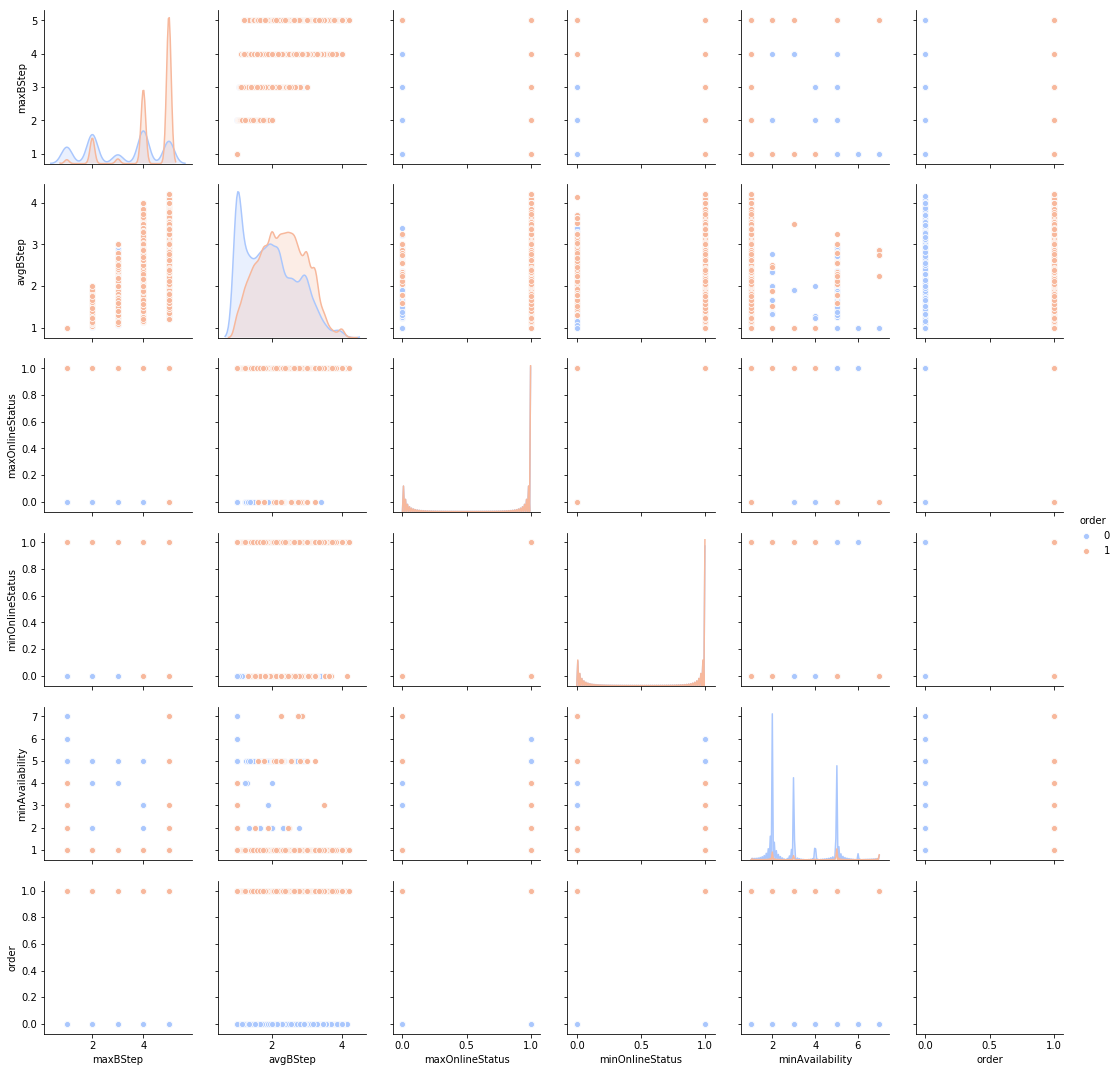

In [12]:
sns.pairplot(data_median_5_plot_m,hue='order',palette='coolwarm')

# Variablen standardisieren

### über alle Testdaten iterieren

In [17]:
from sklearn.preprocessing import StandardScaler
for key, value in data_knn.items():
    scaler_knn = StandardScaler()
    scaler_knn.fit(value['X_train'])
    scaled_features = scaler_knn.transform(value['X_train'])
    df_feat = pd.DataFrame(scaled_features,columns=value['X_train'].columns)

/Users/marianbauersachs/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/marianbauersachs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/Users/marianbauersachs/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/marianbauersachs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/Users/marianbauersachs/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: 

## KNN mit allen Testdateien tranieren und testen

In [20]:
from sklearn.neighbors import KNeighborsClassifier
models_knn = {}
for key, value in data_knn.items():
    knn_model = KNeighborsClassifier(n_neighbors=23)
    knn_model.fit(value['X_train'], value['y_train'])
    prediction_knn = knn_model.predict(value['X_test'])
    models_knn[key] = [knn_model,prediction_knn]

In [18]:
index_data_knn = []
column_data_knn = []
for key, value in models_knn.items():
    index_data_knn.append(key)
    column_data_knn.append(value[0].score(data_log_knn[key]['X_test'], data_log_knn[key]['y_test'])*100)


NameError: name 'models_knn' is not defined

In [257]:
df_data_knn = pd.DataFrame(index=index_data_knn, data=column_data_knn)

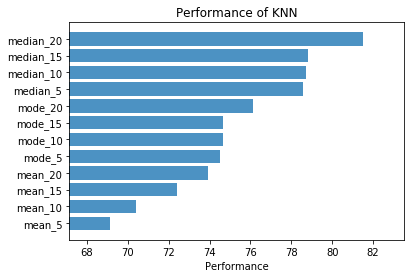

In [262]:
objects = df_data_knn.index.values
y_pos = np.arange(len(objects))
performance = df_data_knn.iloc[:,0].sort_values(ascending=True)

plt.barh(y_pos, performance, align='center', alpha=0.8,left=0)
# plt.xticks(np.arange(70, 100, step=2))
plt.xlim(performance.min()-2, performance.max()+2)
plt.yticks(y_pos, objects)
plt.xlabel('Performance')
plt.title('Performance of KNN')

plt.show()

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=23)

In [40]:
knn.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=23, p=2,
           weights='uniform')

In [41]:
prediction_knn = knn.predict(X_test_knn)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_knn,prediction_knn))
print(classification_report(y_test_knn,prediction_knn))

[[ 1640 12754]
 [ 1448 29226]]
              precision    recall  f1-score   support

           0       0.53      0.11      0.19     14394
           1       0.70      0.95      0.80     30674

   micro avg       0.68      0.68      0.68     45068
   macro avg       0.61      0.53      0.50     45068
weighted avg       0.64      0.68      0.61     45068



## Iterating over couple of n_neighbors to test error rate

In [43]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn_loop = KNeighborsClassifier(n_neighbors=i)
    knn_loop.fit(X_train_knn,y_train_knn)
    prediciton_knn_i = knn_loop.predict(X_test_knn)
    error_rate.append(np.mean(prediciton_knn_i != y_test_knn))
    print(i, flush=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


Text(0, 0.5, 'Error Rate')

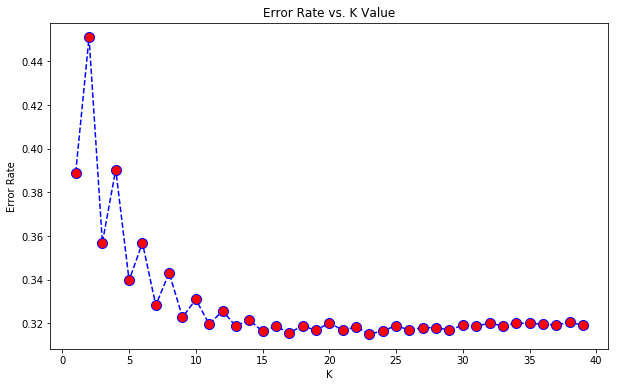

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Wahrscheinlichkeit mit den am besten performenden Testdaten

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_median_20 = KNeighborsClassifier(n_neighbors=23)
knn_model_median_20.fit(data_knn['median_20']['X_train'], data_knn['median_20']['y_train'])
prediction_knn_median_20 = knn_model_median_20.predict(data_knn['median_20']['X_train'])
performance_knn_median_20 = knn_model_median_20.score(data_knn['median_20']['X_test'], data_knn['median_20']['y_test'])*100

In [12]:
performance_knn_median_20 = knn_model_median_20.score(data_knn['median_20']['X_test'], data_knn['median_20']['y_test'])*100

In [13]:
performance_knn_median_20

72.40170409159492

In [14]:
predict_proba_knn_median_20 = knn_model_median_20.predict_proba(data_knn['median_20']['X_test'])
predict_proba_knn_median_20

array([[0.17391304, 0.82608696],
       [0.17391304, 0.82608696],
       [0.52173913, 0.47826087],
       ...,
       [0.95652174, 0.04347826],
       [0.95652174, 0.04347826],
       [0.95652174, 0.04347826]])

In [15]:
loss_ndarray = predict_proba_knn_median_20[...,:1]
win_ndarray = predict_proba_knn_median_20[...,1:]
my_list_test = map(lambda x: x[0], loss_ndarray)
loss_series = pd.Series(my_list_test)
my_list_test = map(lambda x: x[0], win_ndarray)
win_series = pd.Series(my_list_test)

In [16]:
knn_probability_df = pd.DataFrame({'buy_proba': win_series, 'not_buy_proba': loss_series},index=data_knn['median_20']['X_test'].index)
knn_probability_df = knn_probability_df.sort_index()

In [17]:
knn_probability_df_group = knn_probability_df.groupby(knn_probability_df.index).max()

In [28]:
knn_probability_df_group

,buy_proba,not_buy_proba
sessionNo,,
1,0.826087,0.173913
2,0.478261,0.521739
3,0.391304,0.608696
4,0.391304,0.608696
5,0.391304,0.608696
6,0.608696,0.391304
7,0.608696,0.391304
8,0.608696,0.391304
9,0.434783,0.565217


In [19]:
knn_probability_df_group = knn_probability_df.groupby(knn_probability_df.index).max()
bins_groupby = np.arange(0, 1.000001, 0.05)
knn_probability_df_group_bin = knn_probability_df_group.groupby(pd.cut(knn_probability_df_group['buy_proba'],bins_groupby)).count()

In [23]:
knn_probability_df_group_bin

,buy_proba,not_buy_proba
buy_proba,,
"(0.0, 0.05]",16,16
"(0.05, 0.1]",33,33
"(0.1, 0.15]",37,37
"(0.15, 0.2]",59,59
"(0.2, 0.25]",65,65
"(0.25, 0.3]",64,64
"(0.3, 0.35]",128,128
"(0.35, 0.4]",70,70
"(0.4, 0.45]",61,61


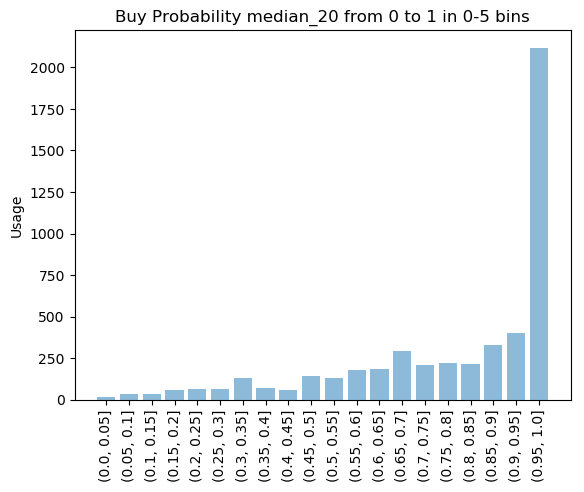

In [27]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = knn_probability_df_group_bin.index.values
y_pos = np.arange(len(objects))
performance = knn_probability_df_group_bin['buy_proba']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation='vertical')
plt.ylabel('Usage')
plt.title('Buy Probability median_20 from 0 to 1 in 0-5 bins')
 
plt.show()